In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Capital Bike Share DataFrames
df_h = pd.read_csv('hour.csv')
df_d = pd.read_csv('day.csv')

## Following are the steps
### STEP-1: Exploratory Data Analysis (EDA)
### STEP-2: Correlation check between *Bicycle_count* (dependent variable) and other features (independent variables)
### STEP-3: Plotting Features like season, hour, weekday for *Bicycle_count*

### STEP-1: Exploratory Data Analysis
- Shape
- Head (print top 5 values as default)
- Missing values
- data type

In [3]:
# Checking the no. of rows and columns in the given DataFrames
print(df_h.shape)
print(df_d.shape)

(17379, 17)
(731, 16)


In [4]:
# Checking Null/no value cells in the DF
print(df_h.isnull().sum())
print(df_d.isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [5]:
# Checking the data type for the DataFrame
df_h.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
# Get weekday, month and year from 'dteday' column
df_h.dteday = pd.to_datetime(df_h.dteday)
df_h.loc[:,'day'] = df_h.dteday.dt.day
df_h.loc[:,'weekday'] = df_h.dteday.dt.day_name()
df_h.loc[:,'month'] = df_h.dteday.dt.month_name()
df_h.loc[:,'yr'] = df_h.dteday.dt.year

In [42]:
# Top 5 (by default) rows for DataFrame with total hourly and seasonal information
df_h.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,casual,registered,cnt,day,month,SEASON,weather,HOLIDAY,WORKINGDAY,celsius
0,1,2011-01-01,1,2011,1,0,0,Saturday,0,1,...,3,13,16,1,January,Spring,Clear,No,No,3.28
1,2,2011-01-01,1,2011,1,1,0,Saturday,0,1,...,8,32,40,1,January,Spring,Clear,No,No,2.34
2,3,2011-01-01,1,2011,1,2,0,Saturday,0,1,...,5,27,32,1,January,Spring,Clear,No,No,2.34
3,4,2011-01-01,1,2011,1,3,0,Saturday,0,1,...,3,10,13,1,January,Spring,Clear,No,No,3.28
4,5,2011-01-01,1,2011,1,4,0,Saturday,0,1,...,0,1,1,1,January,Spring,Clear,No,No,3.28


In [8]:
# describe() function is used to view some basic statistical details like percentile, mean, std etc. of a dataframe or a series of numeric values
df_h.describe()

,instant,season,yr,mnth,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,2011.502561,6.537775,11.546752,0.028770,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,15.683411
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,8.789373
min,1.0000,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2.000000,2011.000000,4.000000,6.000000,0.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,8.000000
50%,8690.0000,3.000000,2012.000000,7.000000,12.000000,0.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,16.000000
75%,13034.5000,3.000000,2012.000000,10.000000,18.000000,0.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,23.000000
max,17379.0000,4.000000,2012.000000,12.000000,23.000000,1.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,31.000000


### STEP-2: Correlation check between *Bicycle_count* (dependent variable) and other features (independent variables)
- Plotting Heat map for the visualization

In [279]:
# corr() is used to find the pairwise correlation of all columns in the dataframe
df_h.corr().abs()[['cnt']]

,cnt
instant,0.278379
season,0.178056
yr,0.250495
mnth,0.120638
hr,0.394071
holiday,0.030927
workingday,0.030284
weathersit,0.142426
temp,0.404772
atemp,0.400929


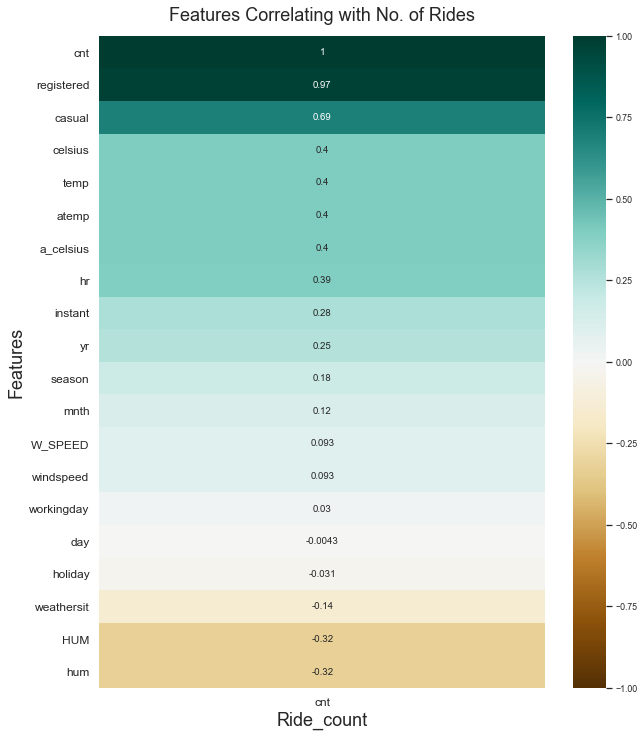

In [308]:

plt.figure(figsize=(10, 12))
heatmap = sns.heatmap(df_h.corr()[['cnt']].sort_values(by='cnt', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with No. of Rides', fontdict={'fontsize':18}, pad=15)

plt.ylabel('Features', fontsize=18)
plt.xlabel('Ride_count', fontsize=18)
plt.tick_params(labelsize=12)

### STEP-3: Plotting Features like seasons, hour, weekday for *Bicycle_count*
- Season effect on Bicycle users
What can we determine from the data?
From an examination of the data, it was decided that several questions could be addressed:

Does season affect bikeshare usage?
Do ridership trends vary based on type of membership?
Does weather affect bikeshare usage?
What would be a valuable direction for further investigation?

In [11]:
df_h.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'month'],
      dtype='object')

## 1- Season

In [12]:
df_h.loc[df_h['season'] == 1, 'SEASON'] = 'Spring'
df_h.loc[df_h['season'] == 2, 'SEASON'] = 'Summer'
df_h.loc[df_h['season'] == 3, 'SEASON'] = 'Fall/Autumn'
df_h.loc[df_h['season'] == 4, 'SEASON'] = 'Winter'

In [13]:
df_h.SEASON.value_counts()

Fall/Autumn    4496
Summer         4409
Spring         4242
Winter         4232
Name: SEASON, dtype: int64

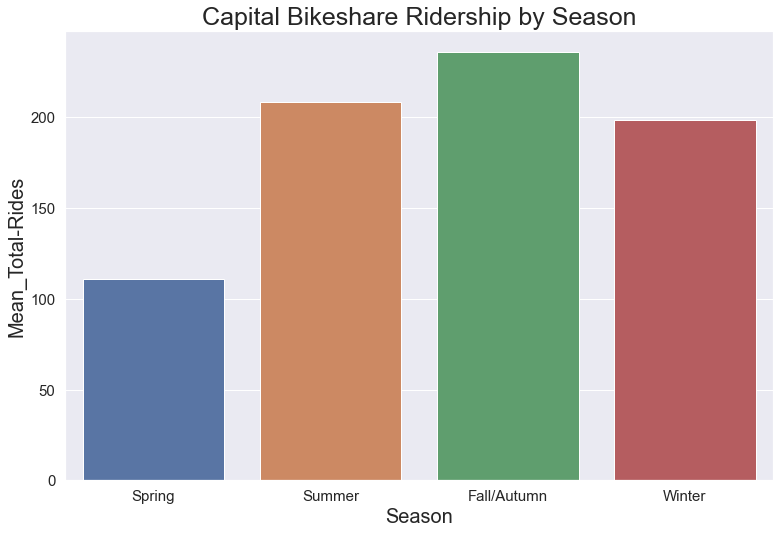

In [251]:
sns.set(rc={'figure.figsize':(12.7,8.27)})
fig, ax = plt.subplots()
sns.barplot(data=df_h[['SEASON','cnt']], x='SEASON', y='cnt', ax=ax, ci=None)

plt.title('Capital Bikeshare Ridership by Season', fontsize=25)
plt.ylabel('Mean_Total-Rides', fontsize=20)
plt.xlabel('Season', fontsize=20)
plt.tick_params(labelsize=15)
plt.show()


Text(0.5, 0, 'Month')

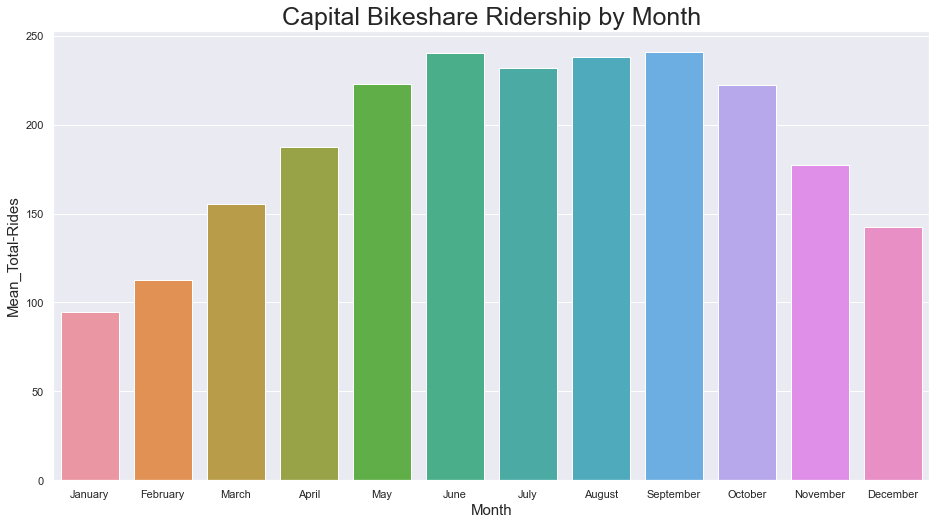

In [229]:
fig, ax = plt.subplots()
sns.barplot(data=df_h[['month','cnt']], x='month', y='cnt', ax=ax, ci=None)

plt.title('Capital Bikeshare Ridership by Month', fontsize=25)
plt.ylabel('Mean_Total-Rides', fontsize=15)
plt.xlabel('Month', fontsize=15)


Text(0, 0.5, 'Mean_Registered')

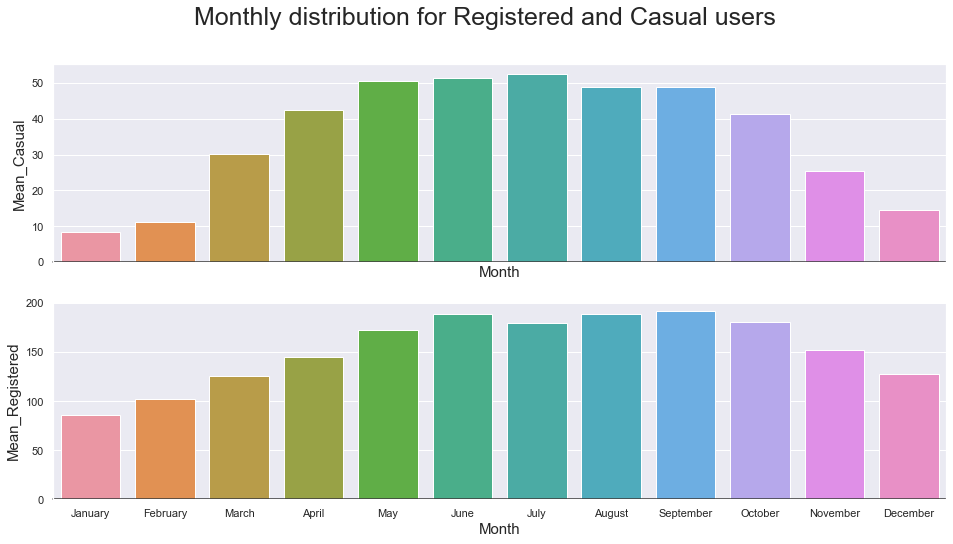

In [236]:
fig, axes = plt.subplots(2, 1, sharex=True, figsize=(16,8))
fig.suptitle('Monthly distribution for Registered and Casual users', fontsize=25)

sns.barplot(data=df_h, x='month', y='casual', ax=axes[0], ci=None)
axes[0].axhline(0, color="k", clip_on=False)
axes[0].set_xlabel("Month", fontsize=15)
axes[0].set_ylabel("Mean_Casual", fontsize=15)

sns.barplot(data=df_h, x='month', y='registered', ax=axes[1], ci=None)
axes[1].axhline(0, color="k", clip_on=False)
axes[1].set_xlabel("Month", fontsize=15)
axes[1].set_ylabel("Mean_Registered", fontsize=15)

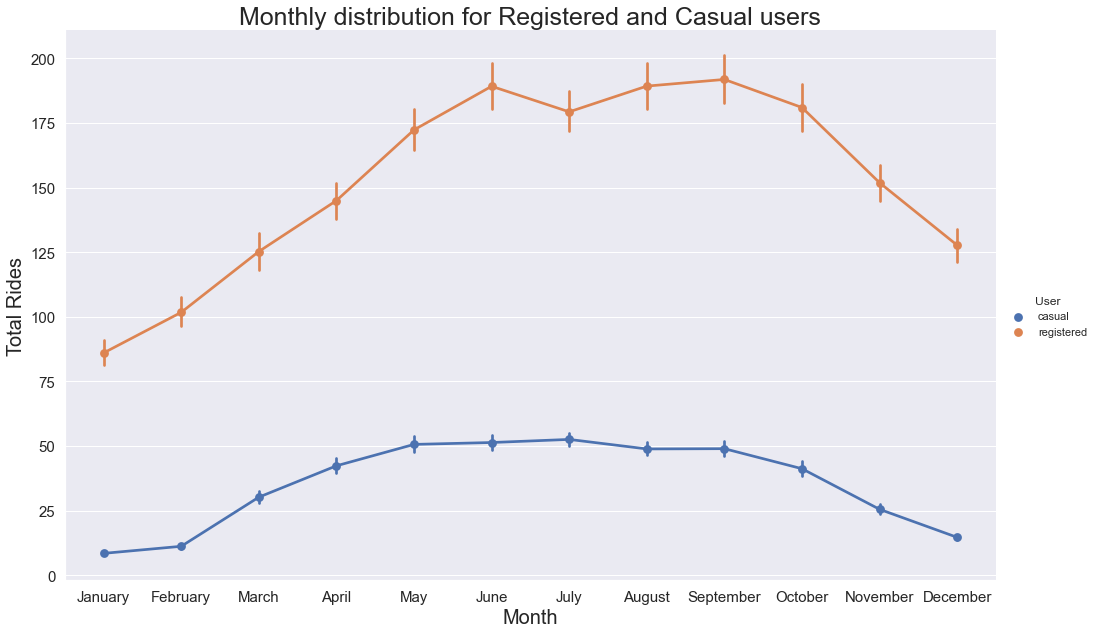

In [253]:
# Catplot is used to plot the multiple columns on one plot

df = df_h[['casual', 'registered', 'month']].melt('month', var_name='User',  value_name='No. of Riders')
sns.catplot(x="month", y="No. of Riders", hue='User', data=df, kind='point', height=8.27, aspect=13.7/8.27)

plt.title('Monthly distribution for Registered and Casual users',fontsize=25)
plt.ylabel('Total Rides',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.tick_params(labelsize=15)

In [15]:
df_h.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,month,SEASON
0,1,2011-01-01,1,2011,1,0,0,Saturday,0,1,0.24,0.2879,0.81,0.0,3,13,16,1,January,Spring
1,2,2011-01-01,1,2011,1,1,0,Saturday,0,1,0.22,0.2727,0.80,0.0,8,32,40,1,January,Spring
2,3,2011-01-01,1,2011,1,2,0,Saturday,0,1,0.22,0.2727,0.80,0.0,5,27,32,1,January,Spring
3,4,2011-01-01,1,2011,1,3,0,Saturday,0,1,0.24,0.2879,0.75,0.0,3,10,13,1,January,Spring
4,5,2011-01-01,1,2011,1,4,0,Saturday,0,1,0.24,0.2879,0.75,0.0,0,1,1,1,January,Spring


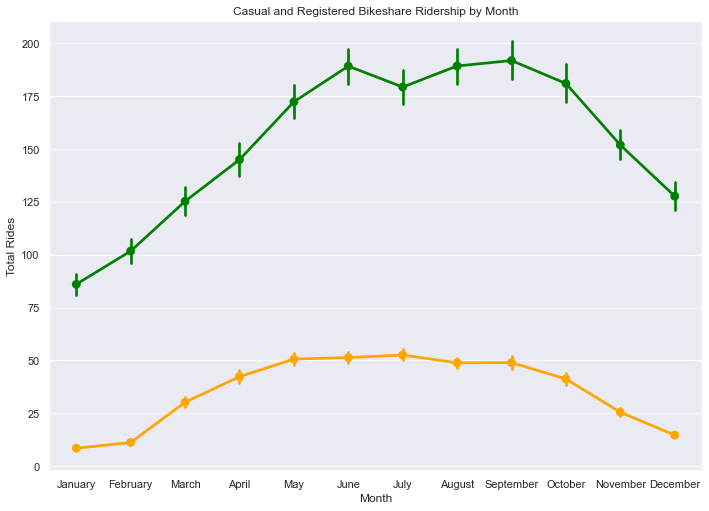

In [16]:

fig, ax = plt.subplots()
sns.pointplot(data=df_h[['month', 'casual', 'registered']], x='month', y='casual', ax=ax, color='orange')

sns.pointplot(data=df_h[['month', 'casual', 'registered']], x='month', y='registered', ax=ax, color='green')

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

plt.show()

## 2- Weather

In [17]:
df_h.loc[df_h['weathersit'] == 1, 'weather'] = 'Clear'
df_h.loc[df_h['weathersit'] == 2, 'weather'] = 'Cloudy'
df_h.loc[df_h['weathersit'] == 3, 'weather'] = 'Light_Rain'
df_h.loc[df_h['weathersit'] == 4, 'weather'] = 'Heavy_Rain'

In [ ]:
# Extra
g = sns.FacetGrid(data=df_h, col='SEASON', row='weather',hue='SEASON')
g.map(plt.hist,'cnt')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Capital Bikeshare Ridership by Weather Type')

g.set_xlabels('Total Rides')
g.set_ylabels('Frequency')

plt.show()

In [ ]:
#sns.countplot(x='SEASON', data=df_h, hue='weather', dodge=True)

In [ ]:
#sns.countplot(x='month', data=df_h, hue='weather', dodge=True)

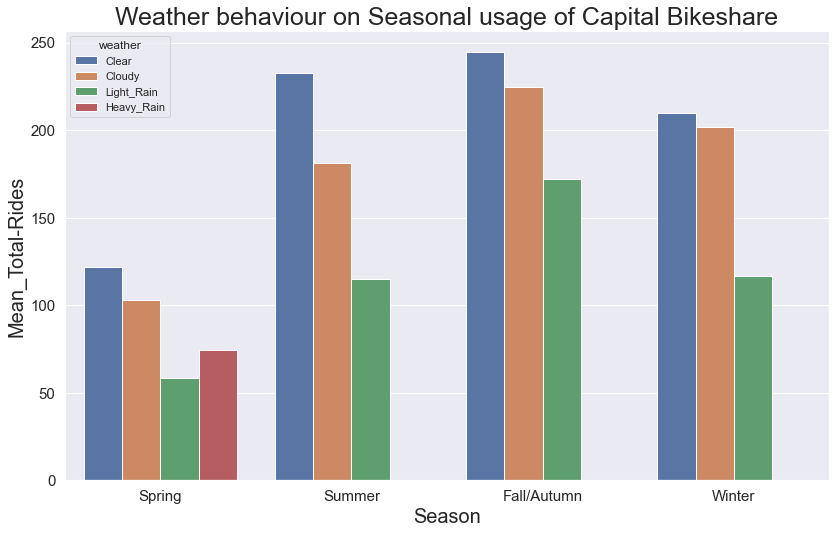

In [255]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.barplot(x='SEASON', y='cnt', hue= 'weather', data=df_h, ci=None)

plt.title('Weather behaviour on Seasonal usage of Capital Bikeshare', fontsize=25)
plt.ylabel('Mean_Total-Rides', fontsize=20)
plt.xlabel('Season', fontsize=20)
plt.tick_params(labelsize=15)

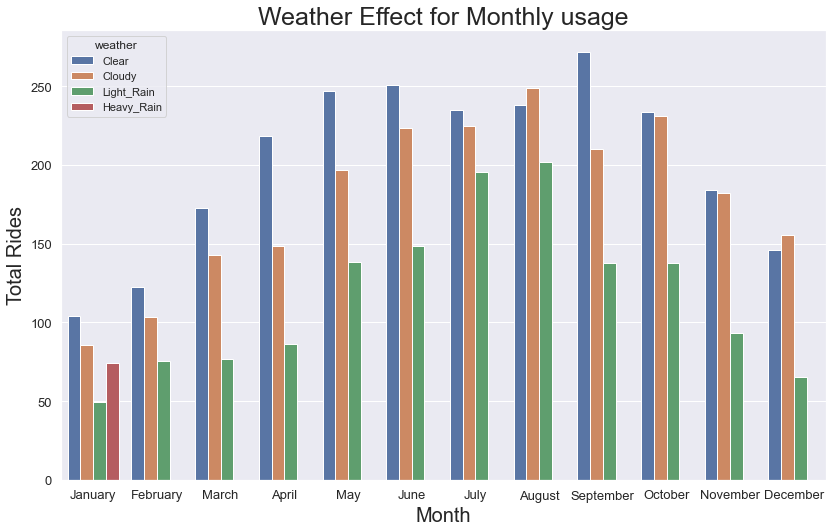

In [257]:
sns.set(rc={'figure.figsize':(13.7,8.27)})
sns.barplot(x='month', y='cnt', hue= 'weather', data=df_h, ci=None)
plt.title('Weather Effect for Monthly usage',fontsize=25)
plt.ylabel('Total Rides',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.tick_params(labelsize=13)

In [24]:
df_h.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,atemp,hum,windspeed,casual,registered,cnt,day,month,SEASON,weather
0,1,2011-01-01,1,2011,1,0,0,Saturday,0,1,...,0.2879,0.81,0.0,3,13,16,1,January,Spring,Clear
1,2,2011-01-01,1,2011,1,1,0,Saturday,0,1,...,0.2727,0.80,0.0,8,32,40,1,January,Spring,Clear
2,3,2011-01-01,1,2011,1,2,0,Saturday,0,1,...,0.2727,0.80,0.0,5,27,32,1,January,Spring,Clear
3,4,2011-01-01,1,2011,1,3,0,Saturday,0,1,...,0.2879,0.75,0.0,3,10,13,1,January,Spring,Clear
4,5,2011-01-01,1,2011,1,4,0,Saturday,0,1,...,0.2879,0.75,0.0,0,1,1,1,January,Spring,Clear


## 3- Workingday and Holiday

In [25]:
df_h.loc[df_h['holiday'] == 0, 'HOLIDAY'] = 'No'
df_h.loc[df_h['holiday'] == 1, 'HOLIDAY'] = 'Yes'

In [26]:
df_h.loc[df_h['workingday'] == 0, 'WORKINGDAY'] = 'No'
df_h.loc[df_h['workingday'] == 1, 'WORKINGDAY'] = 'Yes'

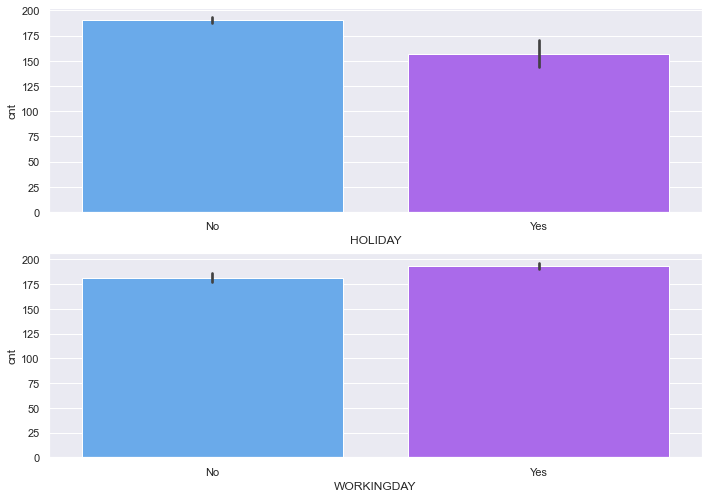

In [27]:
fig, ax = plt.subplots(2,1)

sns.barplot(data=df_h[['HOLIDAY', 'cnt']], x='HOLIDAY', y='cnt', palette='cool', ax=ax[0])
sns.barplot(data=df_h[['WORKINGDAY', 'cnt']], x='WORKINGDAY', y='cnt', palette='cool', ax=ax[1])


#plt.title('Casual and Registered Bikeshare Ridership by Month')
#plt.ylabel('Total Rides')
#plt.xlabel('Time')

plt.show()

## 4- Weekday vs Bike ride

Text(0, 0.5, 'mean_Registered')

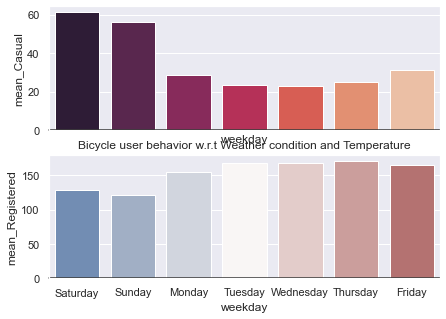

In [199]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 5), sharex=True)
plt.title('Bicycle user behavior w.r.t Weather condition and Temperature')
sns.barplot(data=df_h, x='weekday', y='casual', palette="rocket", ax=ax1, ci=None)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("mean_Casual")

sns.barplot(data=df_h, x='weekday', y='registered', palette="vlag", ax=ax2, ci=None)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("mean_Registered")

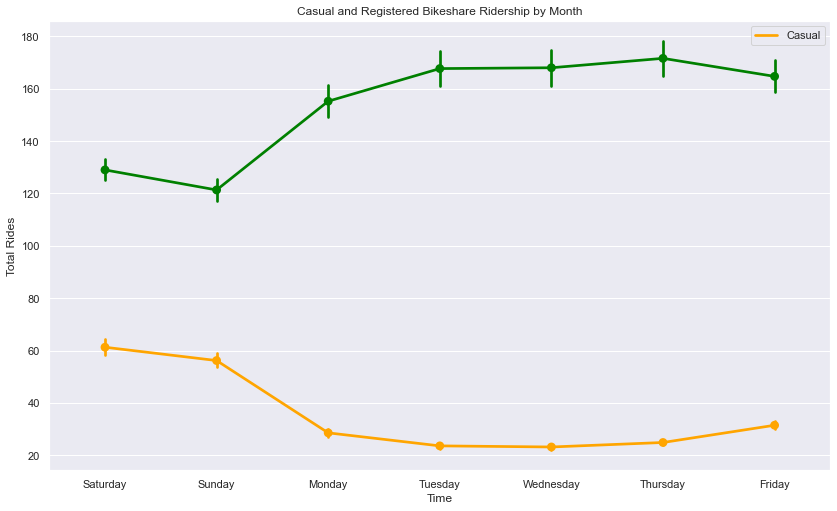

In [156]:
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['weekday', 'casual', 'registered']], x='weekday', y='casual', dodge=True , ax=ax, color='orange')

sns.pointplot(data=df_h[['weekday', 'casual', 'registered']], x='weekday', y='registered', dodge=True, ax=ax, color='green')

ax.legend(handles=ax.lines[::len(df_h.head(30))+1], labels=["Casual","Registered"])
plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Time')

plt.show()

## 5- Day time distribution for Bike riders

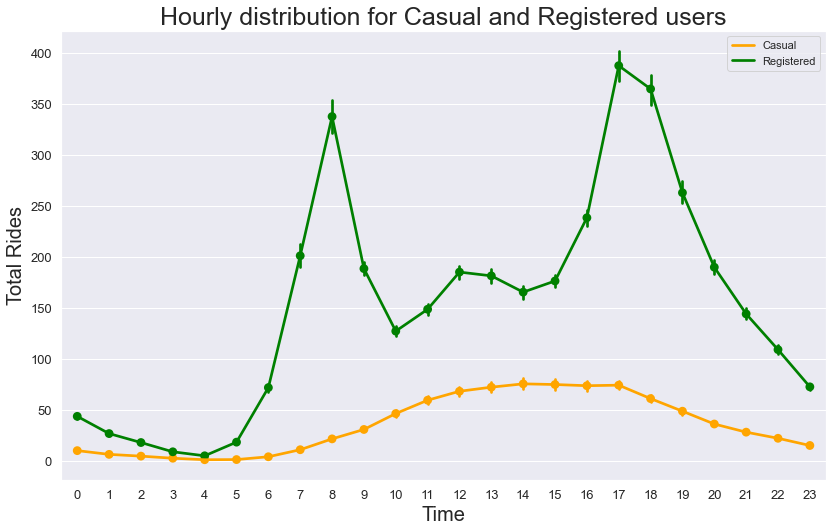

In [261]:
fig, ax = plt.subplots()
sns.pointplot(data=df_h[['hr', 'casual', 'registered']], x='hr', y='casual', ax=ax, color='orange')

sns.pointplot(data=df_h[['hr', 'casual', 'registered']], x='hr', y='registered', ax=ax, color='green')

ax.legend(handles=ax.lines[::len(df_h.head(30))+1], labels=["Casual","Registered"])
plt.title('Hourly distribution for Casual and Registered users', fontsize=25)
plt.ylabel('Total Rides', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.tick_params(labelsize=13)

plt.show()

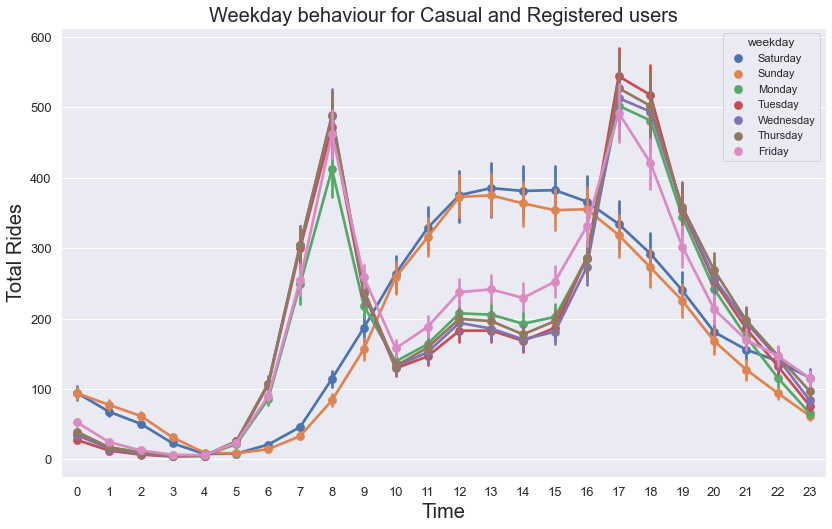

In [265]:
sns.pointplot(data=df_h[['hr', 'weekday', 'cnt']], x='hr', y='cnt', hue='weekday')

plt.title('Weekday behaviour for Casual and Registered users', fontsize=20)
plt.ylabel('Total Rides', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.tick_params(labelsize=13)
plt.show()

<AxesSubplot:>

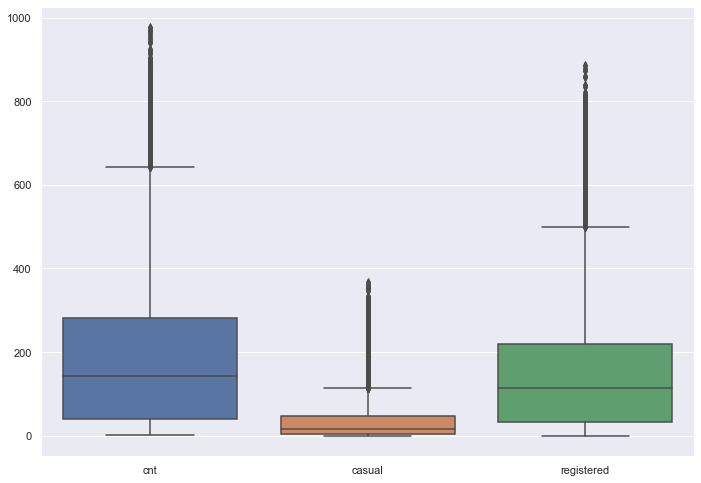

In [30]:
fig = plt.subplot()
sns.boxplot(data=df_h[['cnt', 'casual', 'registered']])

In [37]:
df_h

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,windspeed,casual,registered,cnt,day,month,SEASON,weather,HOLIDAY,WORKINGDAY
0,1,2011-01-01,1,2011,1,0,0,Saturday,0,1,...,0.0000,3,13,16,1,January,Spring,Clear,No,No
1,2,2011-01-01,1,2011,1,1,0,Saturday,0,1,...,0.0000,8,32,40,1,January,Spring,Clear,No,No
2,3,2011-01-01,1,2011,1,2,0,Saturday,0,1,...,0.0000,5,27,32,1,January,Spring,Clear,No,No
3,4,2011-01-01,1,2011,1,3,0,Saturday,0,1,...,0.0000,3,10,13,1,January,Spring,Clear,No,No
4,5,2011-01-01,1,2011,1,4,0,Saturday,0,1,...,0.0000,0,1,1,1,January,Spring,Clear,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,0,Monday,1,2,...,0.1642,11,108,119,31,December,Spring,Cloudy,No,Yes
17375,17376,2012-12-31,1,2012,12,20,0,Monday,1,2,...,0.1642,8,81,89,31,December,Spring,Cloudy,No,Yes
17376,17377,2012-12-31,1,2012,12,21,0,Monday,1,1,...,0.1642,7,83,90,31,December,Spring,Clear,No,Yes
17377,17378,2012-12-31,1,2012,12,22,0,Monday,1,1,...,0.1343,13,48,61,31,December,Spring,Clear,No,Yes


In [51]:
df_h['celsius'] = df_h['temp'] * 47 - 8
df_h['a_celsius'] = df_h['atemp'] * 66 - 16
df_h['HUM'] = df_h['hum'] * 100
df_h['W_SPEED'] = df_h['windspeed'] * 67

In [52]:
df_h

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,...,day,month,SEASON,weather,HOLIDAY,WORKINGDAY,celsius,a_celsius,HUM,W_SPEED
0,1,2011-01-01,1,2011,1,0,0,Saturday,0,1,...,1,January,Spring,Clear,No,No,3.28,3.0014,81.0,0.0000
1,2,2011-01-01,1,2011,1,1,0,Saturday,0,1,...,1,January,Spring,Clear,No,No,2.34,1.9982,80.0,0.0000
2,3,2011-01-01,1,2011,1,2,0,Saturday,0,1,...,1,January,Spring,Clear,No,No,2.34,1.9982,80.0,0.0000
3,4,2011-01-01,1,2011,1,3,0,Saturday,0,1,...,1,January,Spring,Clear,No,No,3.28,3.0014,75.0,0.0000
4,5,2011-01-01,1,2011,1,4,0,Saturday,0,1,...,1,January,Spring,Clear,No,No,3.28,3.0014,75.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,2012,12,19,0,Monday,1,2,...,31,December,Spring,Cloudy,No,Yes,4.22,1.0016,60.0,11.0014
17375,17376,2012-12-31,1,2012,12,20,0,Monday,1,2,...,31,December,Spring,Cloudy,No,Yes,4.22,1.0016,60.0,11.0014
17376,17377,2012-12-31,1,2012,12,21,0,Monday,1,1,...,31,December,Spring,Clear,No,Yes,4.22,1.0016,60.0,11.0014
17377,17378,2012-12-31,1,2012,12,22,0,Monday,1,1,...,31,December,Spring,Clear,No,Yes,4.22,1.9982,56.0,8.9981


In [ ]:
# Not a good option because it is not making any bins/ x-axis is messy
sns.countplot(x='celsius', data=df_h, dodge=True)

Text(5.835000000000001, 0.5, 'Feel_Temp_C°')

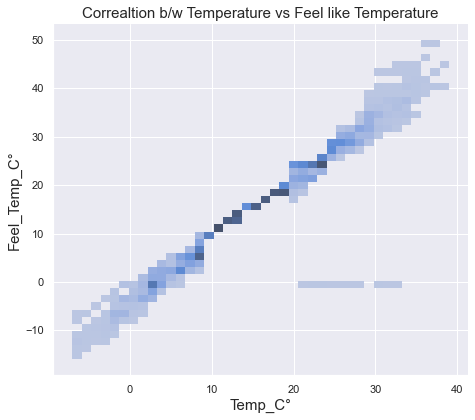

In [278]:

sns.displot(data=df_h, x='celsius', y='a_celsius', height=5.7, aspect=6.7/5.7)
plt.title('Correaltion b/w Temperature vs Feel like Temperature', fontsize=15)
plt.xlabel('Temp_C°', fontsize=15)
plt.ylabel('Feel_Temp_C°', fontsize=15)

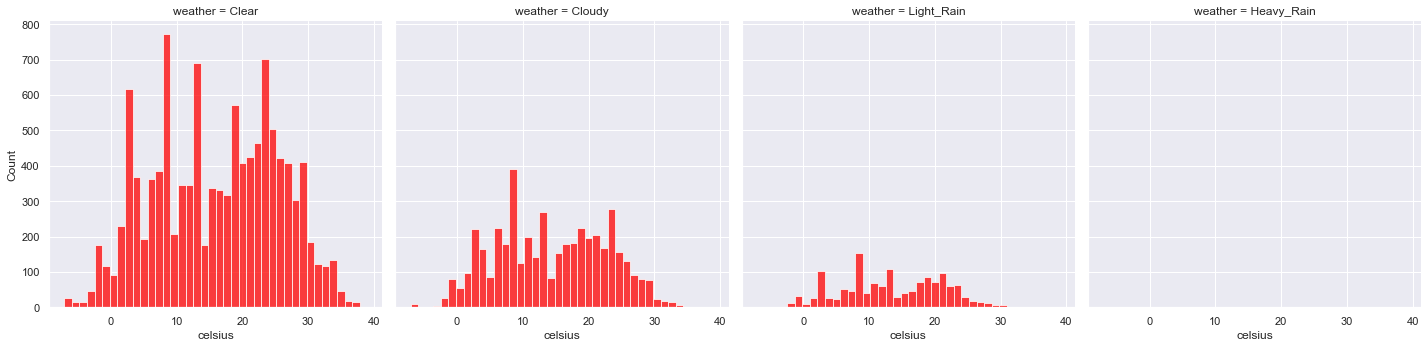

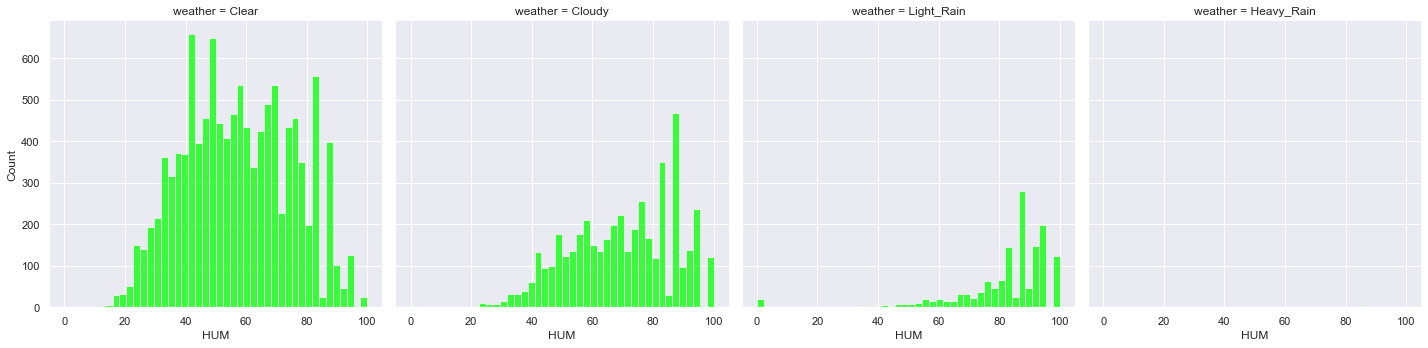

In [165]:

sns.displot(data=df_h, x='celsius', col='weather', color="red")
#sns.displot(data=df_h, x='a_celsius', col='weather', color="red")
#sns.displot(data=df_h, x='W_SPEED', col='weather', color="red")
sns.displot(data=df_h, x='HUM', col='weather', color="lime")

<AxesSubplot:>

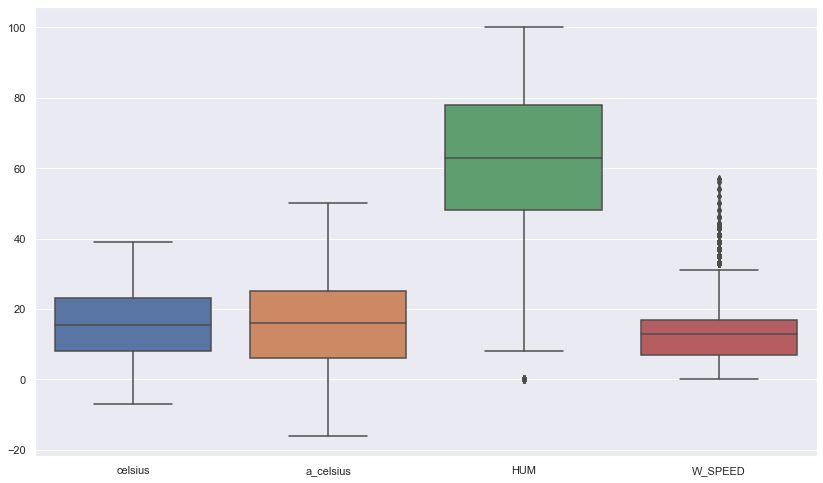

In [163]:
sns.boxplot(data=df_h[['celsius', 'a_celsius', 'HUM', 'W_SPEED']])

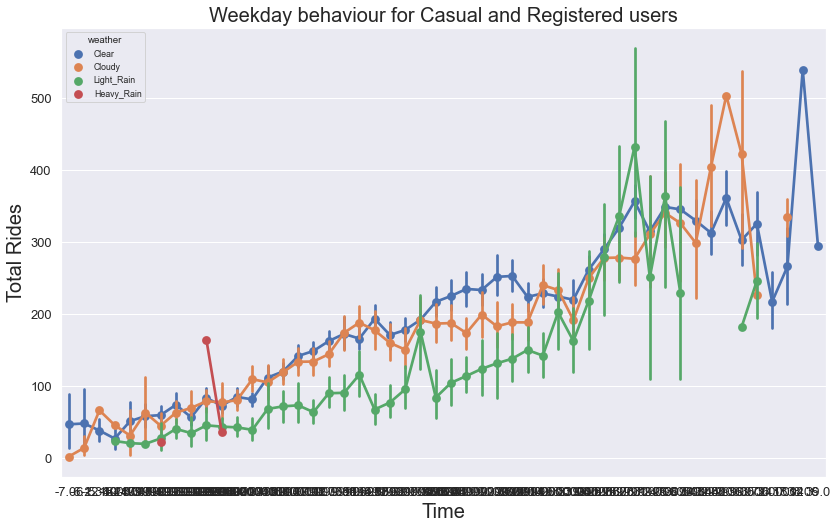

In [309]:
sns.pointplot(data=df_h, x='celsius', y='cnt', hue='weather')

plt.title('Weekday behaviour for Casual and Registered users', fontsize=20)
plt.ylabel('Total Rides', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.tick_params(labelsize=13)
plt.show()

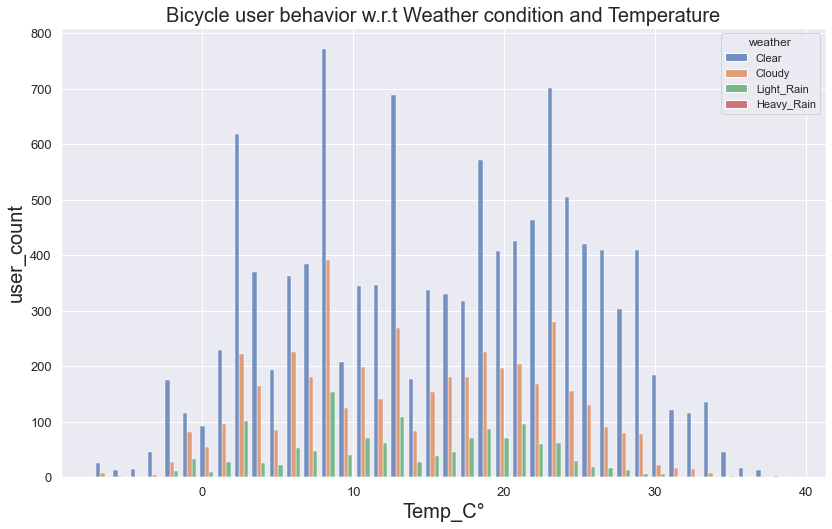

In [269]:
#import matplotlib.pyplot as plt
sns.histplot(data=df_h, x="celsius", hue="weather", multiple="dodge", shrink=1)
plt.title('Bicycle user behavior w.r.t Weather condition and Temperature', fontsize=20)
plt.xlabel('Temp_C°', fontsize=20)
plt.ylabel('user_count', fontsize=20)
plt.tick_params(labelsize=13)

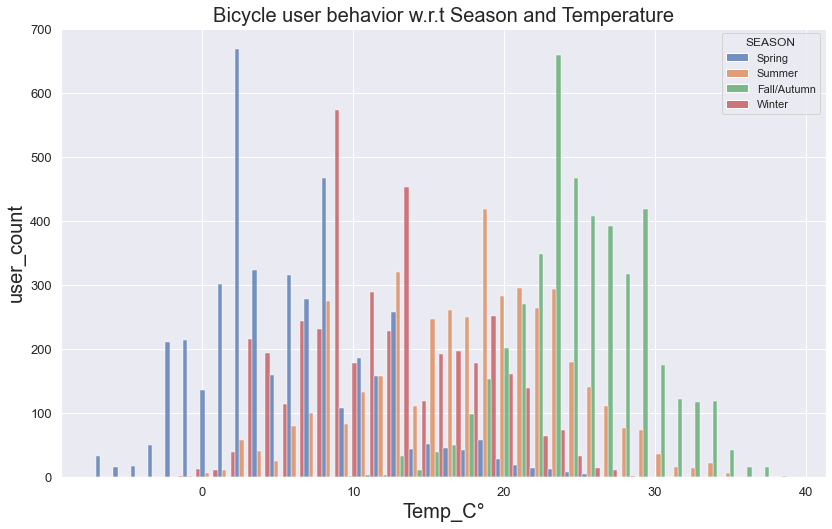

In [271]:
sns.histplot(data=df_h, x="celsius", hue="SEASON", multiple="dodge", shrink=1)
plt.title('Bicycle user behavior w.r.t Season and Temperature', fontsize=20)
plt.xlabel('Temp_C°', fontsize=20)
plt.ylabel('user_count', fontsize=20)
plt.tick_params(labelsize=13)

Text(0, 0.5, 'user_count')

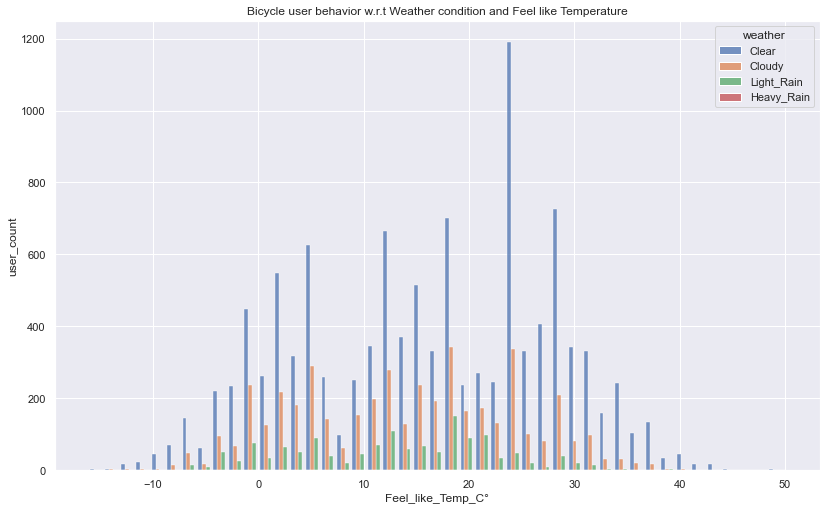

In [266]:
sns.histplot(data=df_h, x="a_celsius", hue="weather", multiple="dodge", shrink=1)
plt.title('Bicycle user behavior w.r.t Weather condition and Feel like Temperature')
plt.xlabel('Feel_like_Temp_C°')
plt.ylabel('user_count')

Text(0, 0.5, 'user_count')

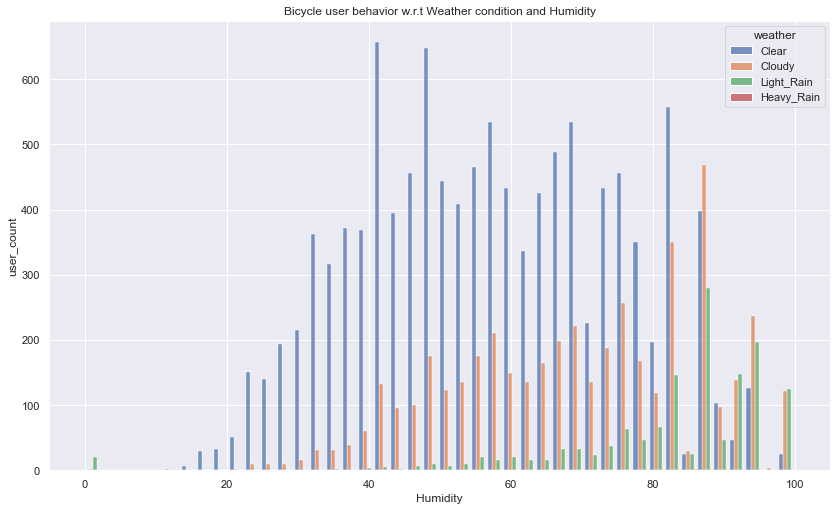

In [158]:
sns.histplot(data=df_h, x="HUM", hue="weather", multiple="dodge", shrink=1)
plt.title('Bicycle user behavior w.r.t Weather condition and Humidity')
plt.xlabel('Humidity')
plt.ylabel('user_count')

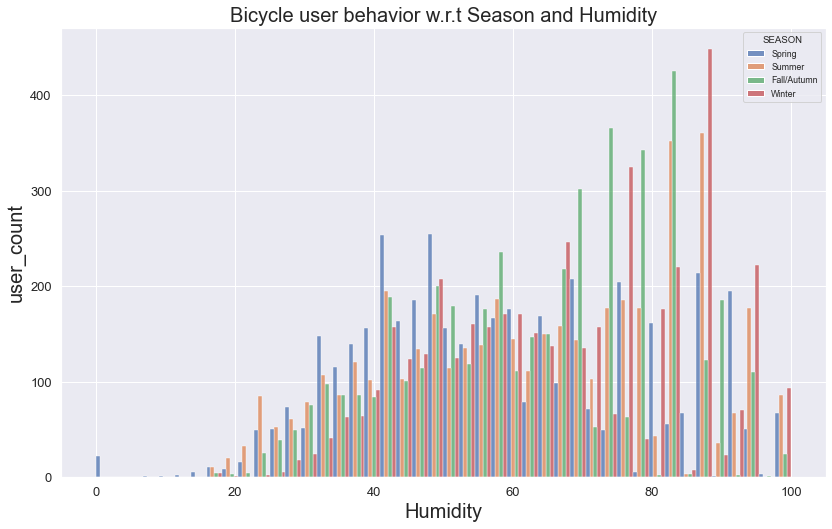

In [314]:
sns.histplot(data=df_h, x="HUM", hue="SEASON", multiple="dodge", shrink=1)
plt.title('Bicycle user behavior w.r.t Season and Humidity', fontsize=20)
plt.xlabel('Humidity', fontsize=20)
plt.ylabel('user_count', fontsize=20)
plt.tick_params(labelsize=13)

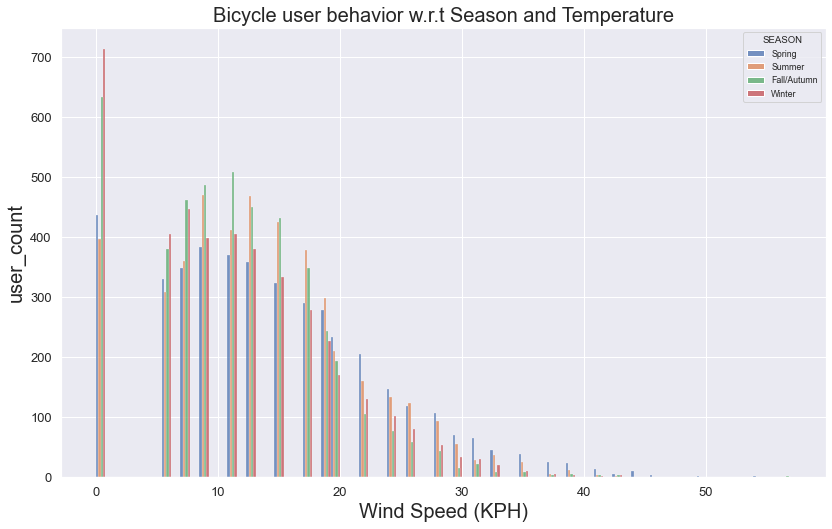

In [313]:
sns.histplot(data=df_h, x="W_SPEED", hue="SEASON", multiple="dodge", shrink=1)
plt.title('Bicycle user behavior w.r.t Season and Wind Speed', fontsize=20)
plt.xlabel('Wind Speed (KPH)', fontsize=20)
plt.ylabel('user_count', fontsize=20)
plt.tick_params(labelsize=13)

In [44]:
df_h.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'day', 'month', 'SEASON', 'weather',
       'HOLIDAY', 'WORKINGDAY', 'celsius'],
      dtype='object')

<AxesSubplot:xlabel='hr', ylabel='cnt'>

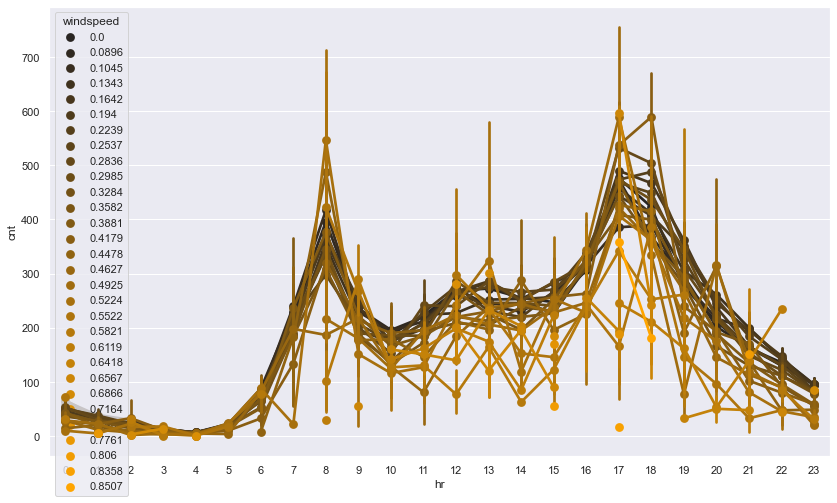

In [48]:
sns.pointplot(data=df_h[['hr', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'celsius']], x='hr', y='cnt', hue= 'windspeed', color='orange')

#sns.pointplot(data=df_h[['weekday', 'casual', 'registered']], x='weekday', y='registered', ax=ax, color='green')

In [50]:
df_h['hum'].unique()

array([0.81, 0.8 , 0.75, 0.86, 0.76, 0.77, 0.72, 0.82, 0.88, 0.87, 0.94,
       1.  , 0.71, 0.66, 0.57, 0.46, 0.42, 0.39, 0.44, 0.47, 0.5 , 0.43,
       0.4 , 0.35, 0.3 , 0.32, 0.64, 0.69, 0.55, 0.59, 0.63, 0.68, 0.74,
       0.51, 0.56, 0.52, 0.49, 0.48, 0.37, 0.33, 0.28, 0.38, 0.36, 0.93,
       0.29, 0.53, 0.34, 0.54, 0.41, 0.45, 0.92, 0.62, 0.58, 0.61, 0.6 ,
       0.65, 0.7 , 0.27, 0.21, 0.25, 0.26, 0.31, 0.73, 0.24, 0.23, 0.22,
       0.19, 0.15, 0.67, 0.1 , 0.08, 0.12, 0.14, 0.13, 0.17, 0.16, 0.18,
       0.96, 0.2 , 0.85, 0.  , 0.9 , 0.83, 0.78, 0.84, 0.89, 0.79, 0.97,
       0.91])